In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [5]:
# Charger le fichier CSV
df = pd.read_csv('../../../data/final_parsed_malt_data_cleaned.csv')

# Convertir la colonne 'categories' en listes Python
df['categories'] = df['categories'].apply(literal_eval)

# Aplatir la colonne 'categories' pour obtenir une liste de toutes les catégories
all_categories = [category for categories_list in df['categories'] for category in categories_list]

# Compter le nombre d'occurrences de chaque catégorie
category_counts = pd.Series(all_categories).value_counts()

# Sélectionner les 15 catégories les plus utilisées
top_15_categories = category_counts.head(15).index.tolist()

# Afficher les 15 catégories les plus utilisées
print(top_15_categories)

['Graphiste', 'Développeur Web Front-end', 'Développeur Web Back-end', 'Webdesigner', 'Rédacteur web', 'Community Manager', 'Illustrateur', 'Photographe', 'Directeur artistique', 'Consultant Marketing', 'Consultant Communication', 'Réalisateur vidéo', 'Concepteur Rédacteur', 'Monteur vidéo', 'Développeur CMS']


In [6]:
import pandas as pd
import ast
from collections import Counter

# Charger le fichier CSV
df = pd.read_csv('../../../data/final_parsed_malt_data_cleaned.csv')

# Convertir les chaînes en listes
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x))

# Compter le nombre d'occurrences pour chaque catégorie
categories_counter = Counter(category for categories in df['categories'] for category in categories)

# Récupérer les 15 catégories les plus fréquentes
top_categories = categories_counter.most_common(15)

# Compter le nombre d'occurrences pour chaque compétence
skills_counter = Counter(skill for skills_list in df['skills'] for skill in skills_list)

# Pour chaque catégorie, récupérer les 5 compétences les plus fréquentes
top_skills_by_category = {category: Counter(skill for categories, skills in zip(df['categories'], df['skills']) if category in categories for skill in skills).most_common(5) for category, _ in top_categories}

# Afficher les résultats
print("Les 15 catégories les plus fréquentes :")
for category, count in top_categories:
    print(f"{category}: {count} occurrences")

# Afficher les 5 compétences les plus fréquentes pour chaque catégorie
print("\nLes 5 compétences les plus fréquentes pour chaque catégorie :")
for category, skills in top_skills_by_category.items():
    print(f"{category}: {skills}")

# Calculer le nombre total d'occurrences de toutes les catégories
total_categories_count = sum(count for _, count in categories_counter.items())

# Calculer le nombre d'occurrences des autres catégories
other_categories_count = total_categories_count - sum(count for _, count in top_categories)

# Afficher le nombre d'occurrences des autres catégories
print(f"\nLe nombre d'occurrences des autres catégories : {other_categories_count}")



FileNotFoundError: [Errno 2] No such file or directory: 'parsed_malt_data.csv'

C:\Users\Mohamed Daoudi\AppData\Local\Temp\ipykernel_32148\1588319718.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('parsed_malt_data.csv')


ValueError: too many values to unpack (expected 2)

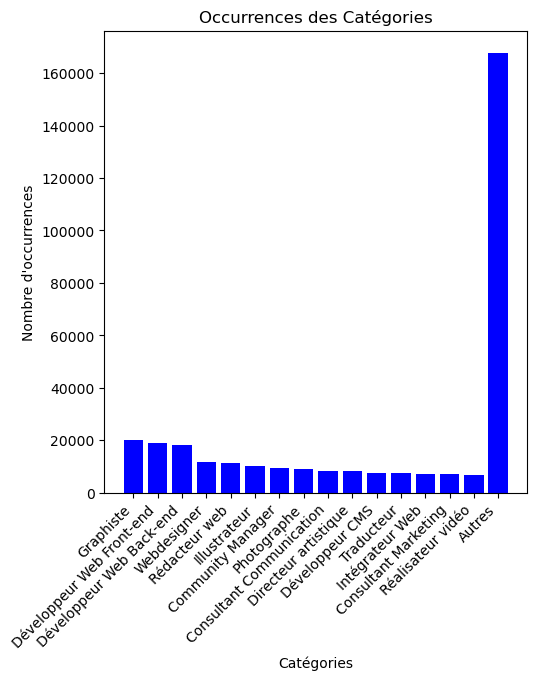

In [ ]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('parsed_malt_data.csv')

# Convertir les chaînes en listes
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x))

# Compter le nombre d'occurrences pour chaque catégorie
categories_counter = Counter(category for categories in df['categories'] for category in categories)

# Récupérer les 15 catégories les plus fréquentes
top_categories = dict(categories_counter.most_common(15))

# Calculer le nombre total d'occurrences de toutes les catégories
total_categories_count = sum(categories_counter.values())

# Calculer le nombre d'occurrences des autres catégories
other_categories_count = total_categories_count - sum(top_categories.values())

# Visualisation avec un diagramme à barres pour les catégories
categories_names = list(top_categories.keys()) + ['Autres']
categories_counts = list(top_categories.values()) + [other_categories_count]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(categories_names, categories_counts, color='blue')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences des Catégories')
plt.xticks(rotation=45, ha='right')

# Pour chaque catégorie, récupérer les 5 compétences les plus fréquentes
top_skills_by_category = {category: Counter(skill for categories, skills in zip(df['categories'], df['skills']) if category in categories for skill in skills).most_common(5) for category, _ in top_categories}

# Visualisation avec un diagramme à barres pour les compétences par catégorie
plt.subplot(1, 2, 2)
for category, skills in top_skills_by_category.items():
    skill_names, skill_counts = zip(*skills)
    plt.barh(skill_names, skill_counts, label=category)

plt.xlabel('Nombre d\'occurrences')
plt.title('Top 5 Compétences par Catégorie')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


C:\Users\Mohamed Daoudi\AppData\Local\Temp\ipykernel_32148\2614339800.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('parsed_malt_data.csv')


ValueError: too many values to unpack (expected 2)

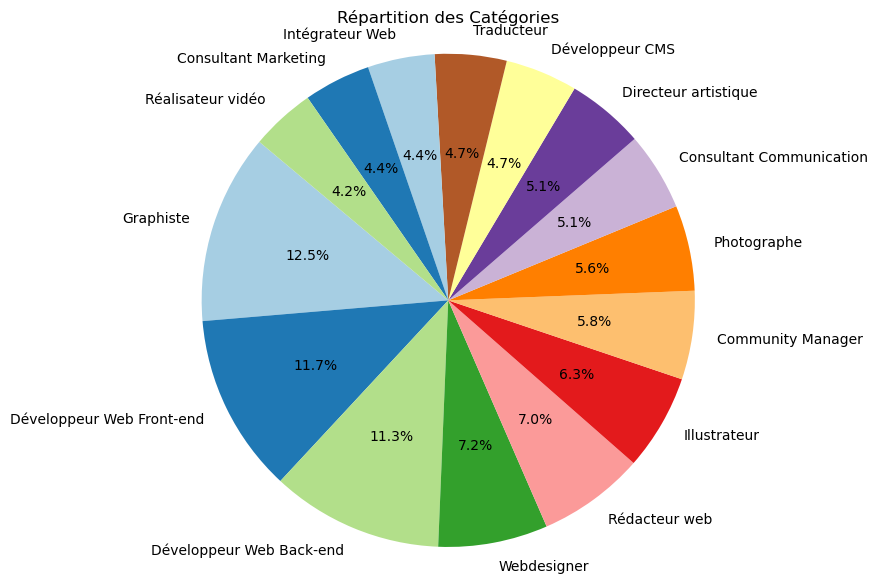

In [ ]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('parsed_malt_data.csv')

# Convertir les chaînes en listes
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x))

# Compter le nombre d'occurrences pour chaque catégorie
categories_counter = Counter(category for categories in df['categories'] for category in categories)

# Récupérer les 15 catégories les plus fréquentes
top_categories = dict(categories_counter.most_common(15))

# Visualisation avec un camembert pour les catégories
categories_names = list(top_categories.keys())
categories_counts = list(top_categories.values())

plt.figure(figsize=(7, 7))
plt.pie(categories_counts, labels=categories_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Répartition des Catégories')

# Pour chaque catégorie, récupérer les 5 compétences les plus fréquentes
top_skills_by_category = {category: Counter(skill for categories, skills in zip(df['categories'], df['skills']) if category in categories for skill in skills).most_common(5) for category, _ in top_categories}

# Visualisation avec un camembert pour les compétences par catégorie
plt.figure(figsize=(15, 7))
for i, (category, skills) in enumerate(top_skills_by_category.items(), 1):
    plt.subplot(3, 5, i)
    skill_names, skill_counts = zip(*skills)
    plt.pie(skill_counts, labels=skill_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{category}')

plt.tight_layout()
plt.show()


C:\Users\Mohamed Daoudi\AppData\Local\Temp\ipykernel_32148\3687817339.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('parsed_malt_data.csv')


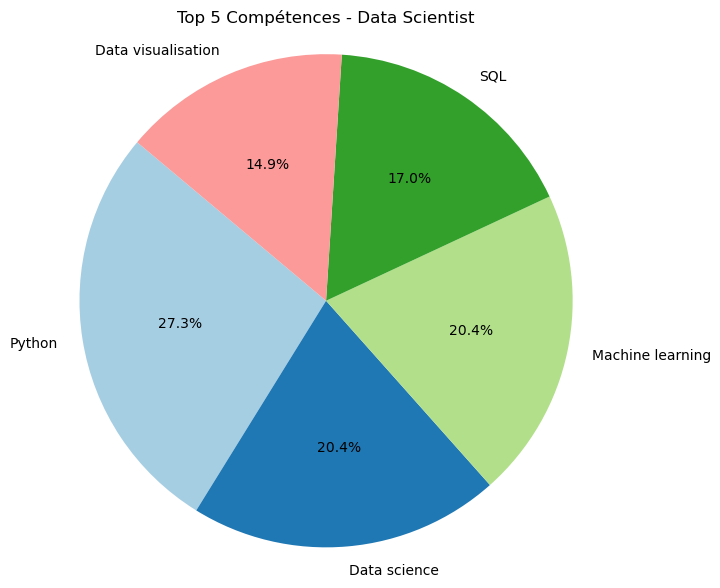

In [ ]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('parsed_malt_data.csv')

# Convertir les chaînes en listes
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x))

# Pour la première catégorie (à ajuster pour chaque script)
category_to_visualize = 'Data Scientist'

# Filtrer les données pour la catégorie spécifique
filtered_data = df[df['categories'].apply(lambda categories: category_to_visualize in categories)]

# Compter le nombre d'occurrences pour chaque compétence
skills_counter = Counter(skill for skills_list in filtered_data['skills'] for skill in skills_list)

# Récupérer les 5 compétences les plus fréquentes
top_skills = dict(skills_counter.most_common(5))

# Visualisation avec un camembert pour les compétences de la catégorie spécifique
plt.figure(figsize=(7, 7))
plt.pie(top_skills.values(), labels=top_skills.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Top 5 Compétences - {category_to_visualize}')

plt.show()
